In [1]:
%matplotlib inline

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.datasets import mnist

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [41]:
tf.keras.backend.clear_session()

In [5]:
input_layer = Input(shape = (40, ))
dense1 = Dense(10)(input_layer)
dense2 = Dense(10)(dense1)
dense3 = Dense(10)(dense2)

last_layer_class = Dense(4, activation = "softmax")(dense3)
last_layer_regr = Dense(1, activation = None)(dense3)

In [6]:
input_layer

<KerasTensor: shape=(None, 40) dtype=float32 (created by layer 'input_1')>

In [7]:
last_layer_class

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_3')>

In [8]:
last_layer_regr

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_4')>

In [9]:
model = Model(inputs = input_layer, outputs = [last_layer_class, last_layer_regr])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 10)           410         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           110         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           110         ['dense_1[0][0]']                
                                                                                              

In [11]:
cnn_model = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    Conv2D(32, kernel_size = (3, 3), activation = "relu"),
    Conv2D(32, kernel_size = (3, 3), activation = "relu"),
    Conv2D(16, kernel_size = (3, 3), activation = "relu"),
    Conv2D(16, kernel_size = (3, 3), activation = "relu")
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 216, 216, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 214, 214, 16)      4624      
                                                                 
 conv2d_5 (Conv2D)           (None, 212, 212, 16)      2320      
                                                                 
Total params: 73,376
Trainable params: 73,376
Non-traina

In [23]:
model = Sequential([
    Input(shape = (224, 224, 3)),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(16, activation = "relu"),
    Dense(16, activation = "relu"),
    
    Flatten(),
    
    Dense(30, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(5, activation = "softmax")
])

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_38 (Dense)            (None, 64)                9633856   
                                                                 
 dense_39 (Dense)            (None, 64)                4160      
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 16)               

In [29]:
cnn_model = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(64, kernel_size = (11, 11), padding = "same", activation = "relu"),
    Conv2D(64, kernel_size = (9, 9), padding = "same", activation = "relu"),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(32, kernel_size = (7, 7), padding = "same", activation = "relu"),
    Conv2D(32, kernel_size = (7, 7), padding = "same", activation = "relu"),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(16, kernel_size = (5, 5), padding = "same", activation = "relu"),
    Conv2D(16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    
    Flatten(),
    BatchNormalization(),
    
    Dense(30, activation = "relu"),
    Dropout(0.1),
    Dense(10, activation = "relu"),
    Dropout(0.05),
    Dense(5, activation = "softmax")
])

In [30]:
cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      23296     
                                                                 
 conv2d_25 (Conv2D)          (None, 224, 224, 64)      331840    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 32)      100384    
                                                                 
 conv2d_27 (Conv2D)          (None, 112, 112, 32)      50208     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [33]:
(attributes_train, labels_train), (attributes_test, labels_test) = mnist.load_data()

In [34]:
attributes_test.shape

(10000, 28, 28)

In [45]:
attributes_train_expanded = np.expand_dims(attributes_train, 3)

In [46]:
attributes_train_expanded = attributes_train_expanded / 255.0

In [42]:
cnn = Sequential([
    Input(shape = (28, 28, 1)),
    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
    Conv2D(32, (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(32, (3, 3), padding = "same", activation = "relu"),
    Conv2D(16, (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    Flatten(),
    
    Dense(64, activation = "relu"),
    Dropout(0.05),
    Dense(10, activation = "softmax")    
])

In [43]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                    

In [44]:
np.expand_dims(attributes_train[0], 2).shape

(28, 28, 1)

In [49]:
cnn.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [50]:
cnn.fit(attributes_train_expanded, labels_train)

1875/1875 [==============================] - 129s 69ms/step - loss: 0.0509 - accuracy: 0.9843


In [51]:
cnn.layers[0].input.shape, cnn.layers[0].output.shape

(TensorShape([None, 28, 28, 1]), TensorShape([None, 28, 28, 64]))

In [52]:
cnn.layers[0].weights[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
array([[[[-5.15924282e-02,  4.39241976e-02, -1.15329832e-01,
           1.26779735e-01, -1.68030206e-02,  1.38955161e-01,
          -1.79164279e-02, -2.85676084e-02, -4.91494872e-02,
           6.84946999e-02, -8.00504833e-02,  9.22680572e-02,
          -1.84896234e-02,  1.86073005e-01, -4.75229695e-02,
          -1.15999274e-01,  1.33262321e-01, -1.14595912e-01,
           8.66935309e-03,  2.09631965e-01,  3.44970264e-02,
          -1.00776814e-01,  1.69852912e-01,  6.30989447e-02,
           1.34573262e-02,  1.17195994e-02,  3.22692432e-02,
          -7.16355741e-02,  4.60060760e-02,  3.93818282e-02,
          -2.16426387e-01,  9.09835175e-02, -1.35272145e-01,
          -2.96723330e-03, -2.03226246e-02,  6.75737038e-02,
           9.99639742e-03, -1.99949089e-02,  3.07692867e-03,
          -1.24705262e-01, -9.28175747e-02, -8.06296393e-02,
          -3.02026011e-02, -2.86593083e-02,  4.09387201e-02,
          -6

In [55]:
cnn.layers[0].kernel.shape

TensorShape([3, 3, 1, 64])

In [ ]:
# 3, 3, 1, 64: filter 3, 3 chanel 1, filters 64

In [56]:
# all values of filter 1
cnn.layers[0].kernel[:, :, :, 0]

<tf.Tensor: shape=(3, 3, 1), dtype=float32, numpy=
array([[[-0.05159243],
        [ 0.0740914 ],
        [-0.03056126]],

       [[-0.11919311],
        [ 0.05028902],
        [-0.12586991]],

       [[ 0.02361591],
        [ 0.06453136],
        [ 0.07017868]]], dtype=float32)>

In [61]:
tf.squeeze(cnn.layers[0].kernel[:, :, :, 0]).numpy()

array([[-0.05159243,  0.0740914 , -0.03056126],
       [-0.11919311,  0.05028902, -0.12586991],
       [ 0.02361591,  0.06453136,  0.07017868]], dtype=float32)

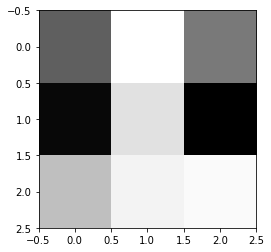

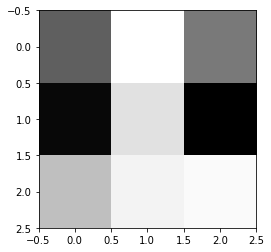

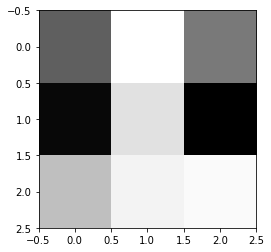

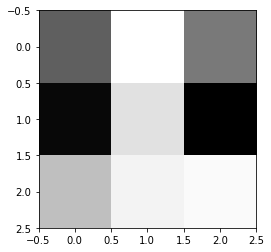

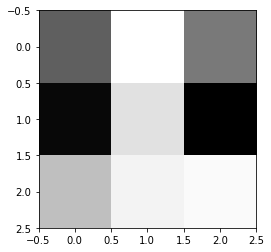

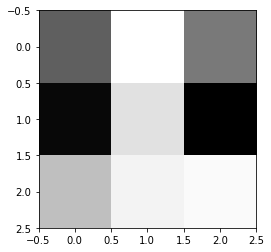

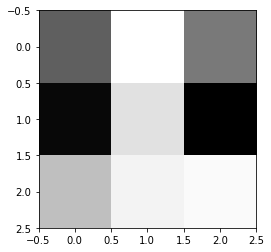

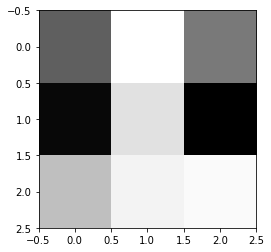

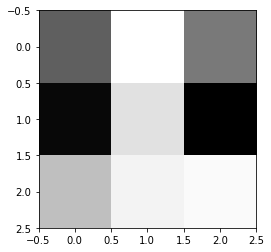

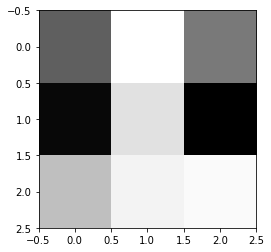

In [63]:
for i in range(10):
    filter_contents = tf.squeeze(cnn.layers[0].kernel[:, :, :, 0]).numpy()
    plt.imshow(filter_contents, cmap = "gray")
    plt.show()

## Working with Data

In [ ]:
cats_dir = os.path.abspath("./")
dogs_dir = os.path.abspath("./")

image_size = (200, 200)

In [ ]:
cat_filenames = [os.path.join(cats_dir, file) for file in os.listdir(cats_dir)]
dog_filenames = [os.path.join(dogs_dir, file) for file in os.listdir(dogs_dir)]

In [ ]:
all_filenames = np.array(cat_filenames + dog_filenames)

In [ ]:
np.random.shuffle(all_filenames)

In [ ]:
def read_image(filename):
    print(filename)
    file_contents = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(file_contents)
    label = ("cat" in os.path.basename(cat_filenames[0])) + 0
    return tf.image.resize(image, image_size)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(all_filenames)

In [ ]:
dataset = dataset.batch(32).prefetch()

In [ ]:
cnn.fit(dataset, labels)

In [ ]:
dataset = dataset.map(read_image)